In [62]:
import pandas as pd
df=pd.DataFrame()

In [63]:
df=pd.read_csv('smriti nagar.csv', index_col='date',parse_dates=True)

<ipython-input-63-77f155fd185c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('smriti nagar.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

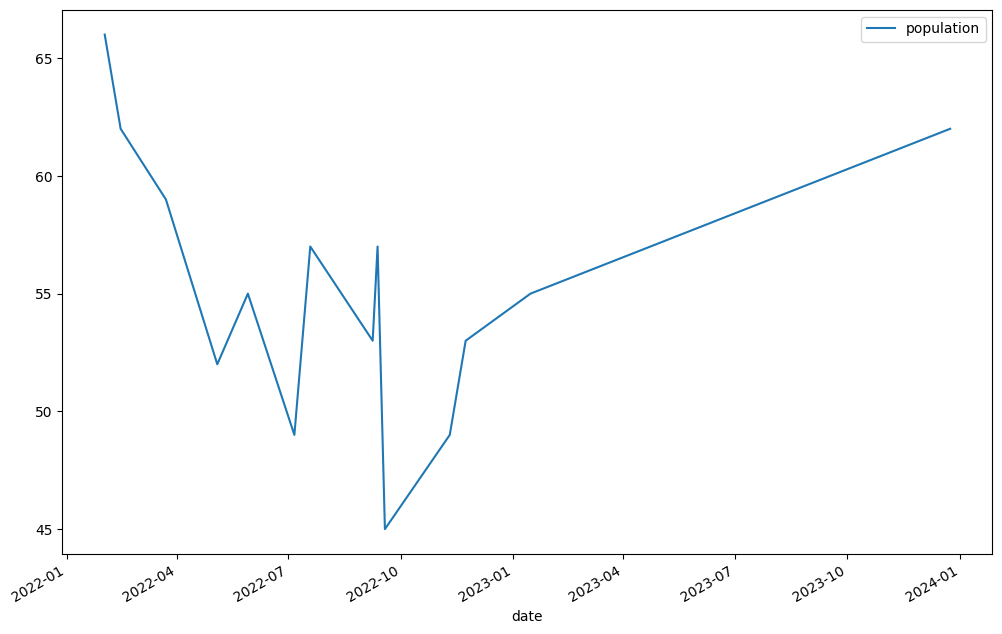

In [53]:
df.columns = ['population']
df.plot(figsize=(12,8))

In [64]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-02-01,66,NaN,NaN,NaN
2022-02-14,62,66.0,NaN,NaN
2022-03-23,59,62.0,66.0,NaN
2022-05-04,52,59.0,62.0,66.0
2022-05-29,55,52.0,59.0,62.0
2022-07-06,49,55.0,52.0,59.0
2022-07-19,57,49.0,55.0,52.0
2022-09-08,53,57.0,49.0,55.0
2022-09-18,45,53.0,57.0,49.0


In [65]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-05-04,52,59.0,62.0,66.0
2022-05-29,55,52.0,59.0,62.0
2022-07-06,49,55.0,52.0,59.0
2022-07-19,57,49.0,55.0,52.0
2022-09-08,53,57.0,49.0,55.0
2022-09-18,45,53.0,57.0,49.0
2022-11-10,49,45.0,53.0,57.0
2022-11-23,53,49.0,45.0,53.0
2022-09-12,57,53.0,49.0,45.0


In [66]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [67]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [68]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[59. 62. 66.]
 [52. 59. 62.]
 [55. 52. 59.]
 [49. 55. 52.]
 [57. 49. 55.]
 [53. 57. 49.]
 [45. 53. 57.]
 [49. 45. 53.]
 [53. 49. 45.]
 [57. 53. 49.]
 [62. 57. 53.]]


In [69]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(10, 3)
(10, 1)


In [70]:
lin_model.fit(X_train,y_train)

LinearRegression()

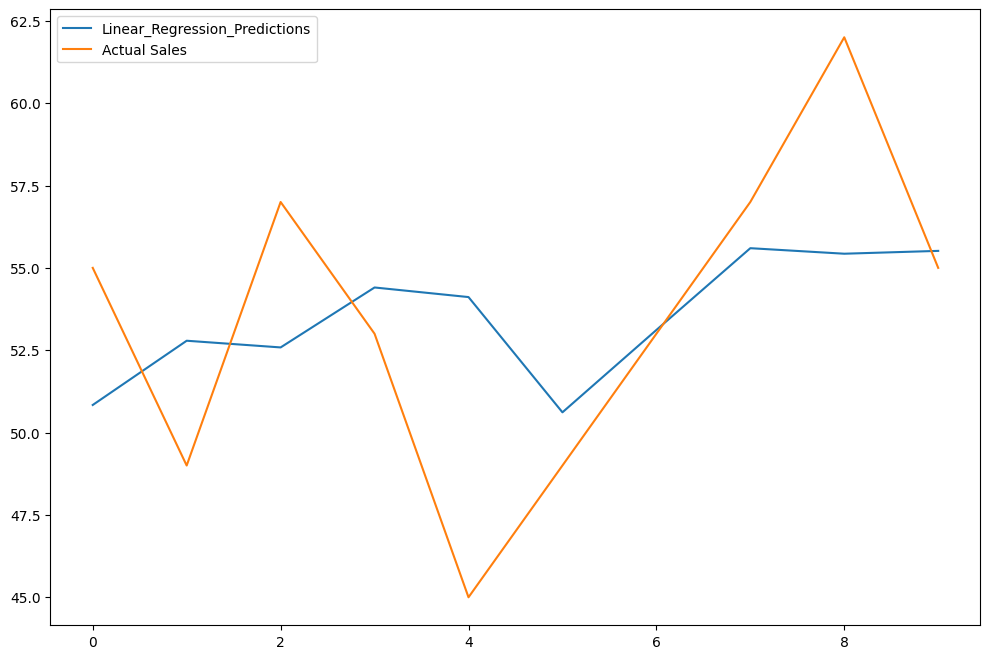

In [71]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [73]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 4.292028929200552
